# Telco Customer Churn Preprocessing 

## Table of Contents
* [Importing Libraries and Dataset](#import)
* [Converting String Data to Numerical Data](#replace)
* [Visualizing Categorical Data](#categorical)
* [Converting Categorical Data to Numerical Data](#category))
* [Converting Dataset to float type](#float)
* [Correlation Matrix](#corr)

<a id="import"></a>

### 1 Importing Libraries and Dataset


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


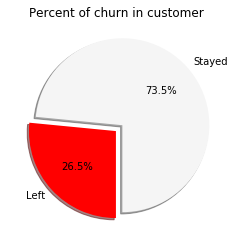

In [3]:
labels=dataset['Churn'].replace({'Yes':'Left','No':'Stayed'}).value_counts(sort = True).index 
sizes = dataset['Churn'].value_counts(sort = True)
colors = ["whitesmoke","red"]
explode = (0.1,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percent of churn in customer')
plt.show()

In [4]:
dataset.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [5]:
dataset.isnull().sum().values.sum()

0

In [6]:
dataset.drop(['customerID'],axis=1,inplace=True)

<a id="replace"></a>

### 2 Converting String Data to Numerical Data
The attribute 'No Phone Service' in 'MultipleLines' and 'No Internet Service' in further columns both mean that the user does not use the service and hence can be mapped to just 'No' making the columns binary in nature.
We will map 'Yes' to '1' and 'No' to 0.
In the Gender column we will replace 'Male' with '1' and 'Female' with '0'.


In [7]:
dataset['MultipleLines'] = dataset['MultipleLines'].replace(to_replace='No phone service' ,value = 'No')
dataset = dataset.reset_index()[dataset.columns]

In [8]:
cols_replace = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
for i in cols_replace:   
    dataset[i] = dataset[i].replace(to_replace='No internet service' ,value = 'No')

In [9]:
binary_replace = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for i in binary_replace:
   dataset[i] = dataset[i].replace({'Yes' :1,'No':0 })

In [10]:
dataset['gender'] = dataset['gender'].replace({'Male':1,'Female':0})

In [11]:
dataset['Churn'] = dataset['Churn'].replace({'Yes':1,'No':0})

<a id="categorical"></a>

### 3 Visualizing Categorical Data


In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data = pd.DataFrame()
data = dataset.apply(le.fit_transform)

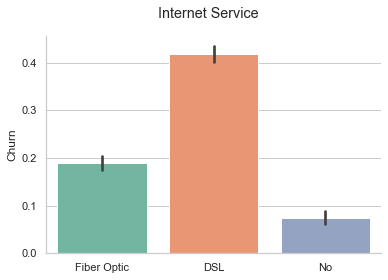

In [13]:
from matplotlib.pyplot import suptitle
from seaborn import despine
sns.set(style="whitegrid")
ax=sns.barplot(x='InternetService',y='Churn',palette="Set2", data=data)
ax.set_xticklabels(["Fiber Optic","DSL","No"])
ax.set_ylabel("Churn")
ax.set_xlabel("")
suptitle("Internet Service")
despine()


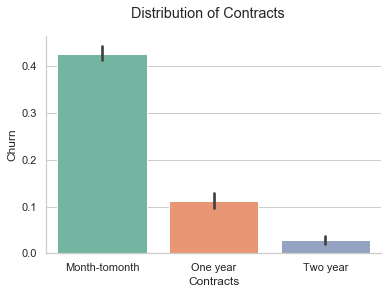

In [14]:
from matplotlib.pyplot import suptitle
from seaborn import despine
sns.set(style="whitegrid")
ax=sns.barplot(x='Contract',y='Churn',palette="Set2", data=data)
ax.set_xticklabels(["Month-tomonth","One year","Two year"])
ax.set_ylabel("Churn")
ax.set_xlabel("Contracts")
suptitle("Distribution of Contracts")
despine()


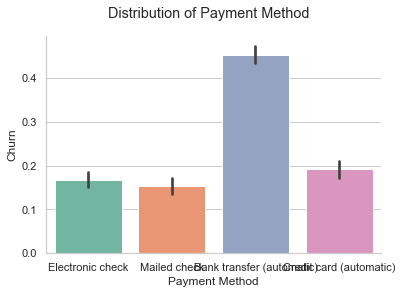

In [15]:
from matplotlib.pyplot import suptitle
from seaborn import despine
sns.set(style="whitegrid")
ax=sns.barplot(x='PaymentMethod',y='Churn',palette="Set2", data=data)
ax.set_xticklabels(["Electronic check","Mailed check","Bank transfer (automatic)","Credit card (automatic)"])
ax.set_ylabel("Churn")
ax.set_xlabel("Payment Method")
suptitle("Distribution of Payment Method")
despine()


<a id="category"></a>

### 4 Converting Categorical Data to Numerical Data
Encoding Categorical variables using pandas.get_dummies instead of oneHotEncoder as it retains column names.
Dropping one column from the resulting dummy columns to avoid the dummy trap(redundacy).


In [16]:
category_replace = ['InternetService','Contract','PaymentMethod']
for i in category_replace:
    dummies = pd.get_dummies(dataset[i],drop_first=False)
    dummies = dummies.add_prefix("{}#".format(i))
    dataset.drop(i,axis=1,inplace=True)
    dataset = dataset.join(dummies)
dataset.drop(['InternetService#No'],axis=1,inplace=True)
dataset.drop(['Contract#Two year'],axis=1,inplace=True)
dataset.drop(['PaymentMethod#Mailed check'],axis=1,inplace=True)

<a id="float"></a>

### 5 Converting Dataset to Float
The TotalCharges column has some string values. First, we will convert it to null and then drop these entires in the dataset.


In [17]:
dataset.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService#DSL                          uint8
InternetService#Fiber optic                  uint8
Contract#Month-to-month        

In [18]:
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [19]:
dataset.TotalCharges.isnull().sum()

11

In [20]:
dataset=dataset[dataset["TotalCharges"].notnull()]

In [21]:
dataset = dataset.astype(float)

In [22]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService#DSL,InternetService#Fiber optic,Contract#Month-to-month,Contract#One year,PaymentMethod#Bank transfer (automatic),PaymentMethod#Credit card (automatic),PaymentMethod#Electronic check
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,29.85,29.85,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,1.0,0.0,1.0,...,56.95,1889.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,1.0,0.0,...,53.85,108.15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,1.0,0.0,1.0,...,42.30,1840.75,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,70.70,151.65,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,0.0,1.0,...,84.80,1990.50,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7039,0.0,0.0,1.0,1.0,72.0,1.0,1.0,0.0,1.0,1.0,...,103.20,7362.90,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
7040,0.0,0.0,1.0,1.0,11.0,0.0,0.0,1.0,0.0,0.0,...,29.60,346.45,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
7041,1.0,1.0,1.0,0.0,4.0,1.0,1.0,0.0,0.0,0.0,...,74.40,306.60,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


<a id="corr"></a>

<a id="corr"></a>

### 6 Correlation Matrix
The correlation matrix reveals high correlation between TotalCharges and Tenure. There also exists a MonthlyCharges column. 
Drop the TotalCharges column as it is just a multiplication of MonthlyCharges and Tenure.


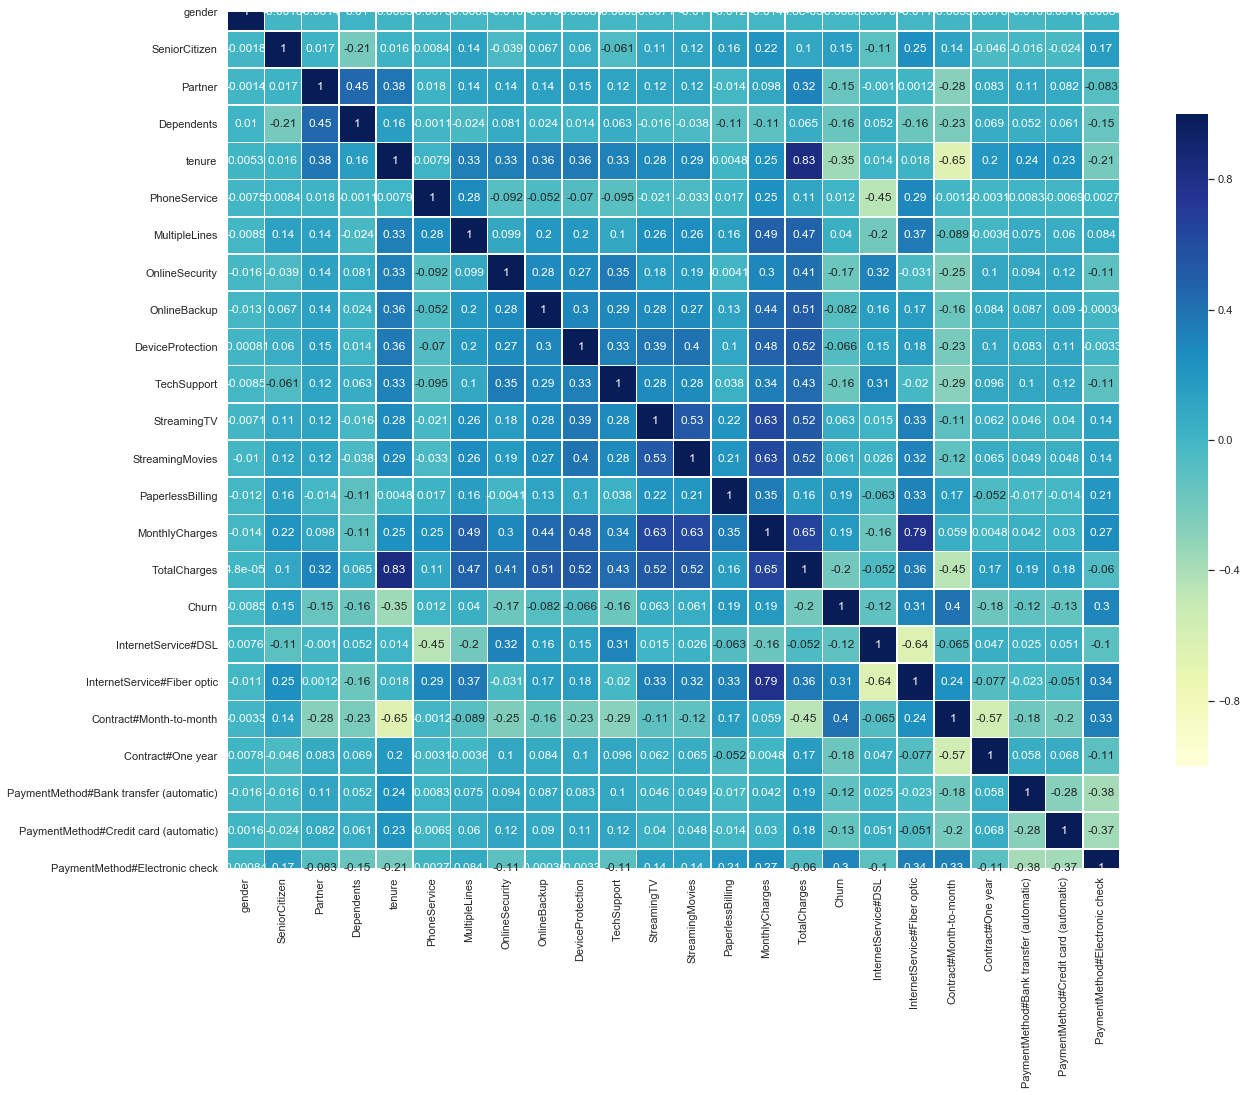

In [23]:

corrmat = dataset.corr()

f, ax = plt.subplots(figsize=(20, 30))

sns.heatmap(corrmat, square=True, linewidths=.5, cmap = 'YlGnBu', vmax=1,vmin=-1, annot=True, 
            annot_kws = {'size': 12}, cbar_kws = {'shrink': .4})

ax.set_yticklabels(corrmat.columns, rotation = 0)
ax.set_xticklabels(corrmat.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [24]:
dataset.drop(['TotalCharges'],axis=1,inplace=True)


In [25]:
dataset.to_csv('Telco-Customer-Churn_2.csv')